# Sign Language Classification

In [1]:
import csv
import numpy as np
import tensorflow as tf
# tf.debugging.set_log_device_placement(True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pyplot as plt #just for checking

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

In [3]:
def get_data(filename):
  with open(filename,'r') as training_file:
    csvreader = csv.reader(training_file)
    next(csvreader)


    labels = []
    images = []
    for row in csvreader:
      # print("label :", row[0], ", data type :",type(row[0])) # I add this so i can see what data inserted to label
      # print("image :", row[1:],"\n") # I add this so i can see what data inserted to label
      # labels.append(np.array(row[0],dtype=np.float32))
      labels.append(row[0])
      image_pixels = np.array(row[1:], dtype=np.float32)
      image = np.array_split(image_pixels,28)
      images.append(image)


    labels = np.array(labels)
    images = np.array(images)
  return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
# my code to check all available labels
label_set = set(map(int,training_labels))
print(label_set)
print(max(label_set))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
24


27455


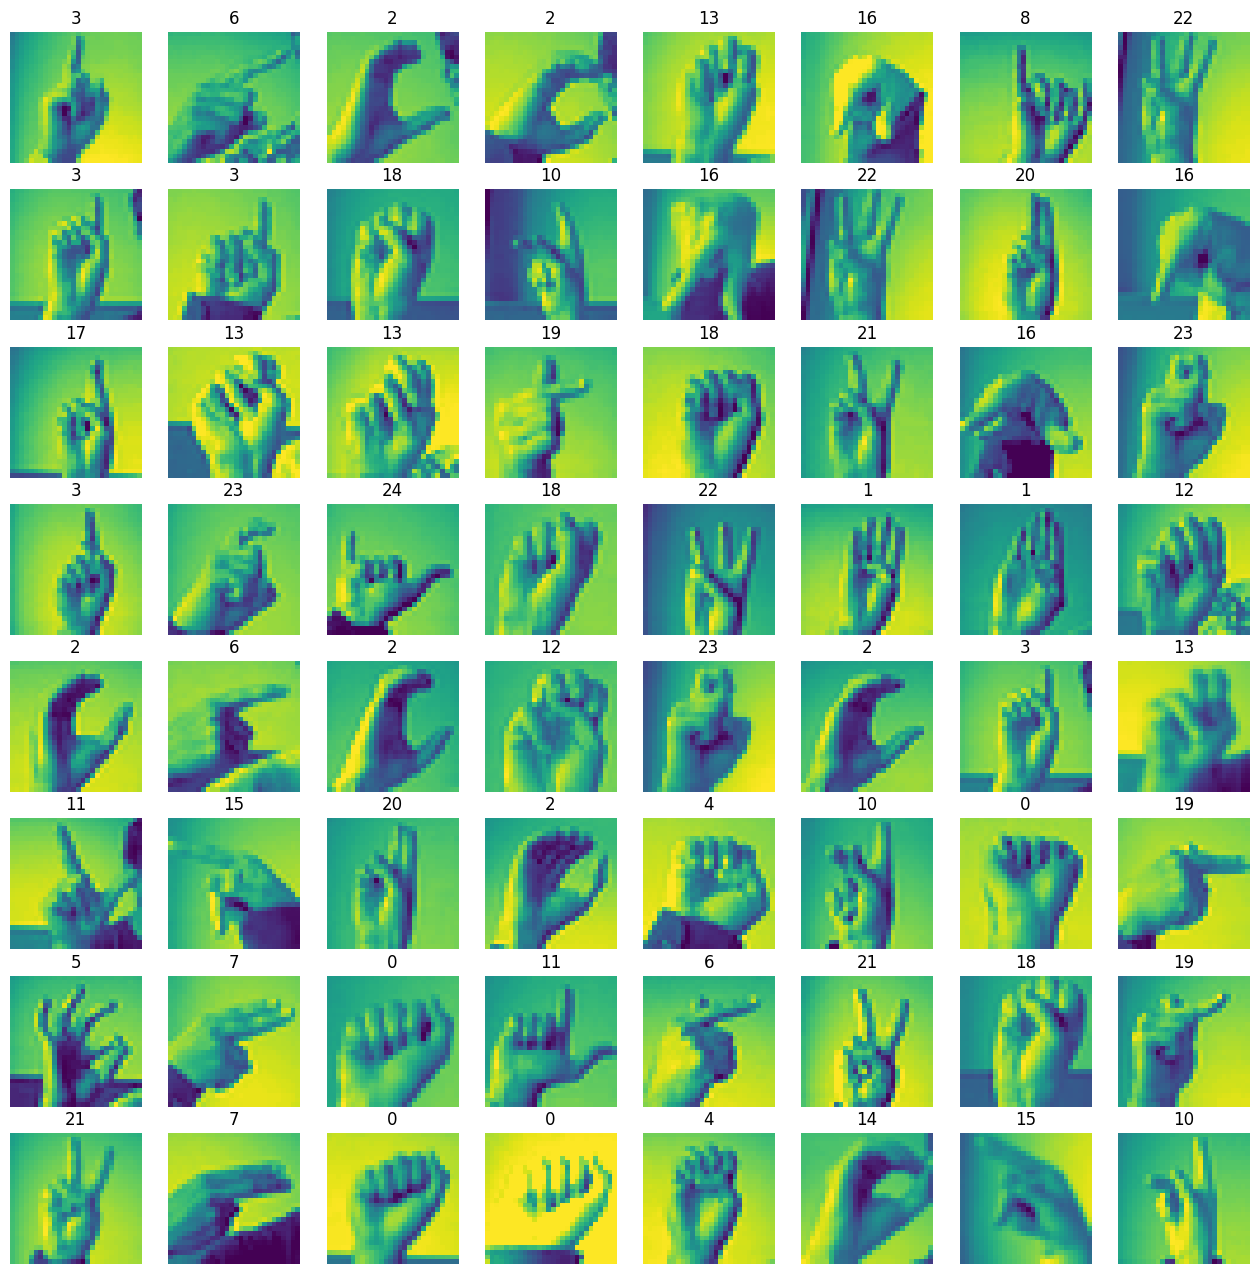

In [5]:
# I code this to visualize the training data
fig = plt.gcf()
fig.set_size_inches(16, 16)
imgs, labels = training_images, training_labels
print(len(imgs))
for i in range(64):
    sp = plt.subplot(8, 8, i+1)
    sp.axis('Off')
    plt.title(labels[i])
    plt.imshow(imgs[i])
plt.show()

7172


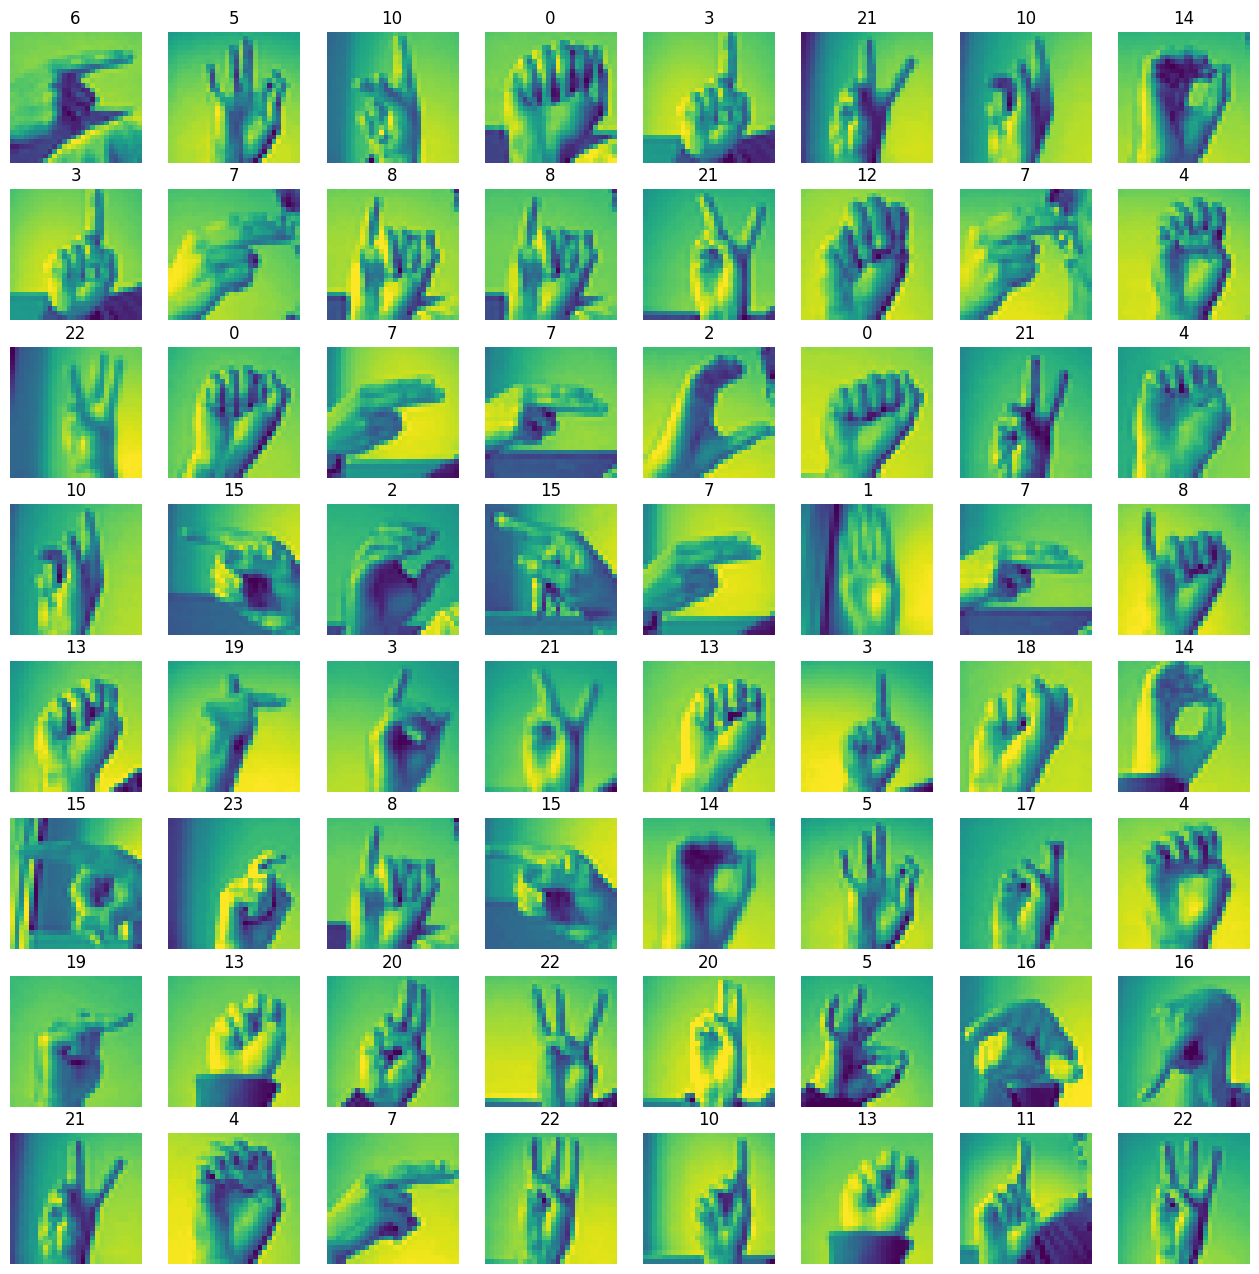

In [6]:
# Visualize the testing data
fig = plt.gcf()
fig.set_size_inches(16, 16)
imgs, labels = testing_images, testing_labels
print(len(imgs))
for i in range(64):
    sp = plt.subplot(8, 8, i+1)
    sp.axis('Off')
    plt.title(labels[i])
    plt.imshow(imgs[i])
plt.show()

In [7]:
# Add another dimension to the data
if len(training_images.shape) < 4: # I add this just to make sure the dimention only expand with the desired size
    training_images = np.expand_dims(training_images,axis=3)# Your Code Here
if len(testing_images.shape) < 4: # I add this just to make sure the dimention only expand with the desired size
    testing_images = np.expand_dims(testing_images,axis=3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
        rescale=1./255,
    )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
# I code this to convert the label into one hot encode categorical data
category_train_labels = tf.keras.utils.to_categorical(training_labels,max(label_set)+1)
category_test_labels = tf.keras.utils.to_categorical(testing_labels,max(label_set)+1)

# This code is added to make training and validation input with data that generated with train_datagen using training_images data and validation_datagen using testing_images data 
train_generator = train_datagen.flow(training_images, category_train_labels, batch_size=32)
validation_generator = validation_datagen.flow(testing_images, category_test_labels, batch_size=32)
# train_generator = train_datagen.flow(training_images, training_labels, batch_size=32)
# validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size=32)

32


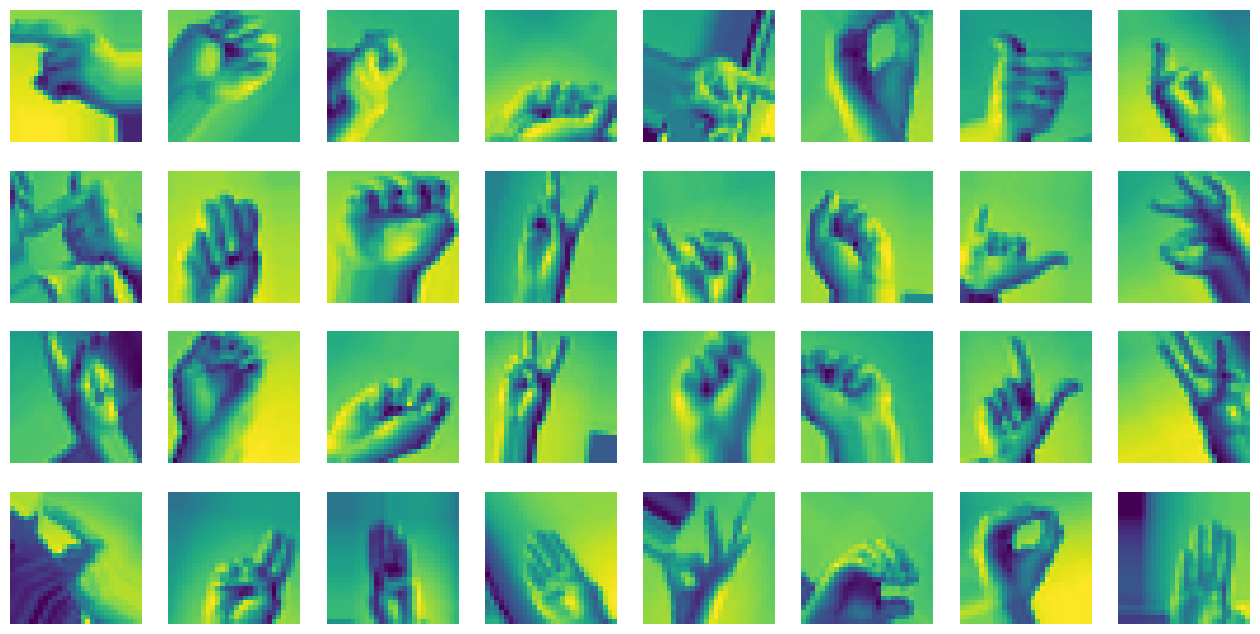

In [9]:
# Visualize the data generated from the train_generator
fig = plt.gcf()
fig.set_size_inches(16, 8)
imgs, labels = train_generator.next()
print(len(imgs))
for i in range(32):
    sp = plt.subplot(4, 8, i+1)
    sp.axis('Off')
    # plt.title(labels[i])
    plt.imshow(imgs[i])
plt.show()

32


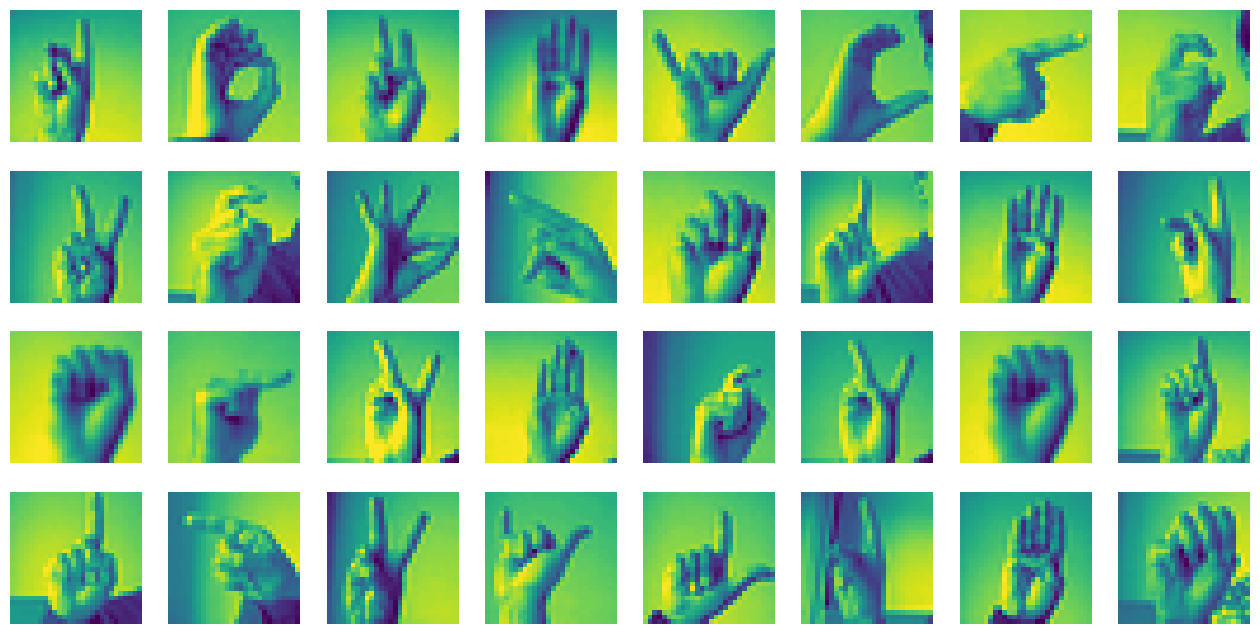

In [10]:
# Visualize the data generated from the validation_generator
fig = plt.gcf()
fig.set_size_inches(16, 8)
imgs, labels = validation_generator.next()
print(len(imgs))
for i in range(32):
    sp = plt.subplot(4, 8, i+1)
    sp.axis('Off')
    # plt.title(labels[i])
    plt.imshow(imgs[i])
plt.show()

# Model with GPU

In [11]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
with tf.device("/GPU:0"):
    # Define the model
    # Use no more than 2 Conv2D and 2 MaxPooling2D
    model_with_GPU = tf.keras.models.Sequential([
        # Your Code Here
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2,2),
            # tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
            # tf.keras.layers.MaxPooling2D(2,2),
            # tf.keras.layers.Dropout(rate=0.3),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(rate=0.3),
            tf.keras.layers.Dense(25, activation='softmax')
        ])

    # Compile Model. 
    model_with_GPU.compile(
        loss='categorical_crossentropy',
        # optimizer = 'adam',
        optimizer=tf.keras.optimizers.Adam(lr=1e-4),
        metrics=['accuracy']
    )

    # Train the Model
    history_with_GPU = model_with_GPU.fit(# Your Code Here
            train_generator,
            steps_per_epoch=857, 
            epochs=50,
            validation_data=validation_generator,
            validation_steps=224, 
            verbose=2
    )

    model_with_GPU.evaluate(testing_images, category_test_labels)


Epoch 1/50


c:\Users\adinu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


857/857 - 11s - loss: 3.0997 - accuracy: 0.0755 - val_loss: 2.7961 - val_accuracy: 0.1494 - 11s/epoch - 13ms/step
Epoch 2/50
857/857 - 5s - loss: 2.7115 - accuracy: 0.1637 - val_loss: 2.1542 - val_accuracy: 0.3750 - 5s/epoch - 6ms/step
Epoch 3/50
857/857 - 5s - loss: 2.4341 - accuracy: 0.2354 - val_loss: 1.8747 - val_accuracy: 0.3983 - 5s/epoch - 6ms/step
Epoch 4/50
857/857 - 6s - loss: 2.1914 - accuracy: 0.3036 - val_loss: 1.6245 - val_accuracy: 0.4593 - 6s/epoch - 7ms/step
Epoch 5/50
857/857 - 7s - loss: 1.9978 - accuracy: 0.3587 - val_loss: 1.3785 - val_accuracy: 0.5438 - 7s/epoch - 8ms/step
Epoch 6/50
857/857 - 5s - loss: 1.8325 - accuracy: 0.4082 - val_loss: 1.2826 - val_accuracy: 0.5561 - 5s/epoch - 6ms/step
Epoch 7/50
857/857 - 10s - loss: 1.7144 - accuracy: 0.4412 - val_loss: 1.2180 - val_accuracy: 0.5818 - 10s/epoch - 12ms/step
Epoch 8/50
857/857 - 5s - loss: 1.5963 - accuracy: 0.4784 - val_loss: 1.0403 - val_accuracy: 0.6593 - 5s/epoch - 6ms/step
Epoch 9/50
857/857 - 5s - los

In [13]:
model_with_GPU.evaluate(training_images, category_train_labels)

858/858 [==============================] - 3s 4ms/step - loss: 31.8232 - accuracy: 0.9121


[31.823179244995117, 0.9120743274688721]

In [14]:
model_with_GPU.evaluate(testing_images, category_test_labels)

225/225 [==============================] - 1s 3ms/step - loss: 58.8402 - accuracy: 0.8737


[58.840171813964844, 0.8736754059791565]

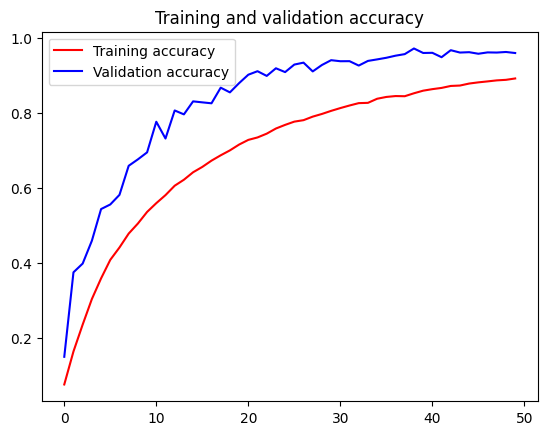

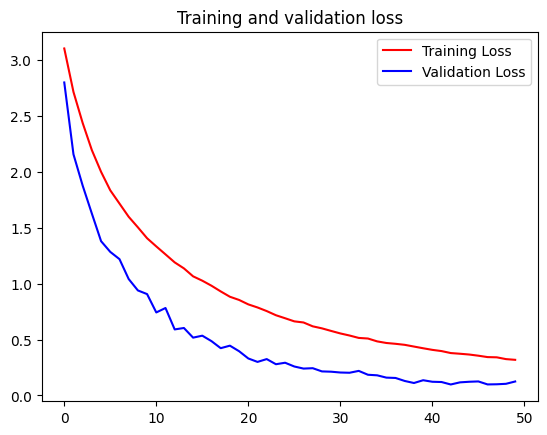

In [15]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history_with_GPU.history['accuracy']
val_acc = history_with_GPU.history['val_accuracy']
loss = history_with_GPU.history['loss']
val_loss = history_with_GPU.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Without GPU

In [16]:
with tf.device("/CPU:0"):
    # Define the model
    # Use no more than 2 Conv2D and 2 MaxPooling2D
    model_without_GPU = tf.keras.models.Sequential([
        # Your Code Here
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPooling2D(2,2),
            # tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
            # tf.keras.layers.MaxPooling2D(2,2),
            # tf.keras.layers.Dropout(rate=0.3),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(rate=0.3),
            tf.keras.layers.Dense(25, activation='softmax')
        ])

    # Compile Model. 
    model_without_GPU.compile(
        # Your Code Here
        loss='categorical_crossentropy',
        # optimizer = 'adam',
        optimizer=tf.keras.optimizers.Adam(lr=1e-4),
        metrics=['accuracy']
    )

    # Train the Model
    history_without_GPU = model_without_GPU.fit(# Your Code Here
            train_generator,
            steps_per_epoch=857, 
            epochs=50,
            validation_data=validation_generator,
            validation_steps=224, 
            verbose=2
    )

    model_without_GPU.evaluate(testing_images, category_test_labels)

Epoch 1/50
857/857 - 29s - loss: 3.0547 - accuracy: 0.0841 - val_loss: 2.6738 - val_accuracy: 0.1795 - 29s/epoch - 34ms/step
Epoch 2/50
857/857 - 29s - loss: 2.6499 - accuracy: 0.1786 - val_loss: 2.1441 - val_accuracy: 0.2825 - 29s/epoch - 34ms/step
Epoch 3/50
857/857 - 27s - loss: 2.3840 - accuracy: 0.2513 - val_loss: 1.8555 - val_accuracy: 0.3574 - 27s/epoch - 32ms/step
Epoch 4/50
857/857 - 27s - loss: 2.1602 - accuracy: 0.3155 - val_loss: 1.5401 - val_accuracy: 0.4746 - 27s/epoch - 31ms/step
Epoch 5/50
857/857 - 26s - loss: 1.9877 - accuracy: 0.3619 - val_loss: 1.3564 - val_accuracy: 0.5745 - 26s/epoch - 31ms/step
Epoch 6/50
857/857 - 28s - loss: 1.8354 - accuracy: 0.4039 - val_loss: 1.2660 - val_accuracy: 0.5901 - 28s/epoch - 32ms/step
Epoch 7/50
857/857 - 26s - loss: 1.7092 - accuracy: 0.4417 - val_loss: 1.1259 - val_accuracy: 0.6180 - 26s/epoch - 30ms/step
Epoch 8/50
857/857 - 25s - loss: 1.5834 - accuracy: 0.4863 - val_loss: 0.9760 - val_accuracy: 0.6918 - 25s/epoch - 30ms/step


In [18]:
model_without_GPU.evaluate(training_images, category_train_labels)

858/858 [==============================] - 3s 4ms/step - loss: 10.9652 - accuracy: 0.9515


[10.96516227722168, 0.9514842629432678]

In [19]:
model_without_GPU.evaluate(testing_images, category_test_labels)

225/225 [==============================] - 1s 4ms/step - loss: 30.8353 - accuracy: 0.9028


[30.83525848388672, 0.9028165340423584]

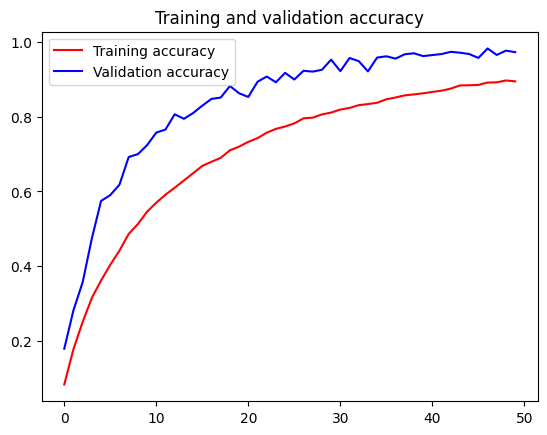

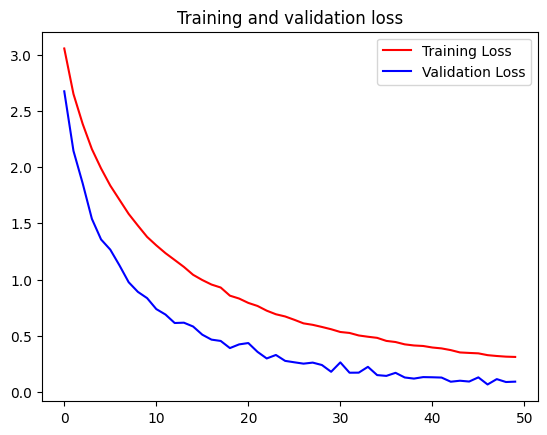

In [17]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history_without_GPU.history['accuracy']
val_acc = history_without_GPU.history['val_accuracy']
loss = history_without_GPU.history['loss']
val_loss = history_without_GPU.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()